<a href="https://colab.research.google.com/github/Prateekbangwal/machine_learning/blob/master/horses_human_classification_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-20 16:27:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   178MB/s    in 0.8s    

2020-06-20 16:27:10 (178 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse39-6.png', 'horse21-4.png', 'horse24-9.png', 'horse23-0.png', 'horse13-5.png', 'horse44-1.png', 'horse45-8.png', 'horse42-0.png', 'horse09-0.png', 'horse22-0.png']
['human01-14.png', 'human10-30.png', 'human03-21.png', 'human15-07.png', 'human06-16.png', 'human04-09.png', 'human06-15.png', 'human06-17.png', 'human15-29.png', 'human17-14.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

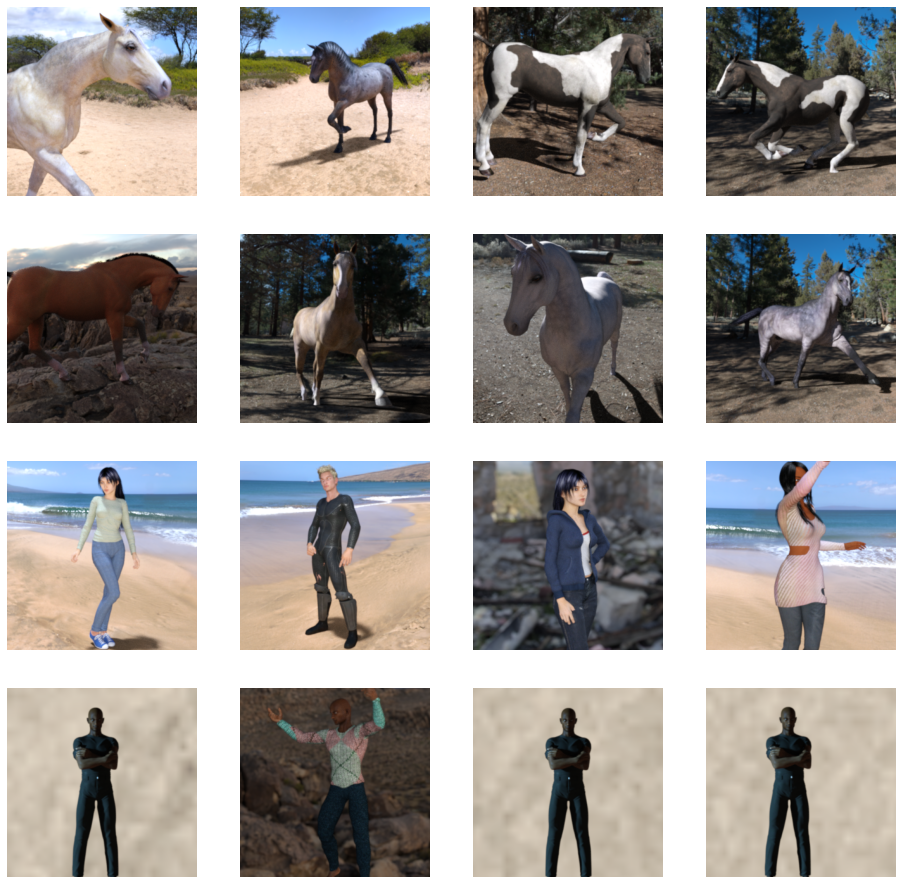

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape =(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512 , activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile (loss = 'binary_crossentropy',
               optimizer = RMSprop(lr = 0.001),
               metrics = ['accuracy'])


In [ ]:
#Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generater = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size =(300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
#training of the model

history = model.fit(
    train_generater,
    steps_per_epoch = 8,
    epochs = 18,
    verbose = 1
)

Epoch 1/18
8/8 [==============================] - 62s 8s/step - loss: 3.8695 - accuracy: 0.5306
Epoch 2/18
8/8 [==============================] - 64s 8s/step - loss: 0.7099 - accuracy: 0.6808
Epoch 3/18
8/8 [==============================] - 73s 9s/step - loss: 0.5411 - accuracy: 0.7519
Epoch 4/18
8/8 [==============================] - 62s 8s/step - loss: 0.2918 - accuracy: 0.8799
Epoch 5/18
8/8 [==============================] - 71s 9s/step - loss: 0.1482 - accuracy: 0.9453
Epoch 6/18
8/8 [==============================] - 62s 8s/step - loss: 0.4707 - accuracy: 0.8142
Epoch 7/18
8/8 [==============================] - 73s 9s/step - loss: 0.2289 - accuracy: 0.9121
Epoch 8/18
8/8 [==============================] - 62s 8s/step - loss: 0.1059 - accuracy: 0.9633
Epoch 9/18
8/8 [==============================] - 62s 8s/step - loss: 0.0574 - accuracy: 0.9800
Epoch 10/18
8/8 [==============================] - 62s 8s/step - loss: 0.0545 - accuracy: 0.9744
Epoch 11/18
8/8 [======================

In [ ]:
#Running the model
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size =(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn+ "is a human")
  else:
    print(fn+ "is a human")


Saving horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg to horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg
[0.]
horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpgis a human
